In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [2]:
def calc_mand_compl(resolution, precision, border):
    x = -0.5 #place on grid
    y = 0     #place on grid
    scale = 2.5

    minX = x - scale / 2
    minY = y - scale / 2

    out_matrix = np.zeros((resolution, resolution),dtype=np.complex_)

    for row in range(resolution):
        for col in range(resolution):
            z = minX + col * scale / resolution + (minY + row * scale / resolution) * 1j
            firstZ = z#0.279155 + 0.01j
            for i in range(precision + 1):
                z = z ** 2 + firstZ
                if z.real * z.real + z.imag * z.imag > border:
                    break
            #print(z)
            #print(f'col={col},row={row}, i={i}')
            out_matrix[col,row] = z

    return out_matrix

time: 3.8418147563934326


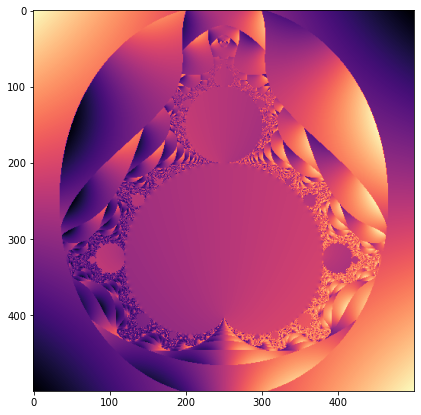

In [3]:
t1 = time.time()
resolution = 500
mb_py = calc_mand_compl(resolution, 100, 2)
print ("time:", time.time() - t1)
plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(mb_py.imag, cmap='magma')

### cython source of mandelbrot_compl_cond:
https://github.com/ksn38/cython_examples/blob/main/Imaginary_units_of_of_Mandelbrot_set/mandelbrot_compl_cond/mandelbrot_compl_cond.pyx

time: 2.544011354446411


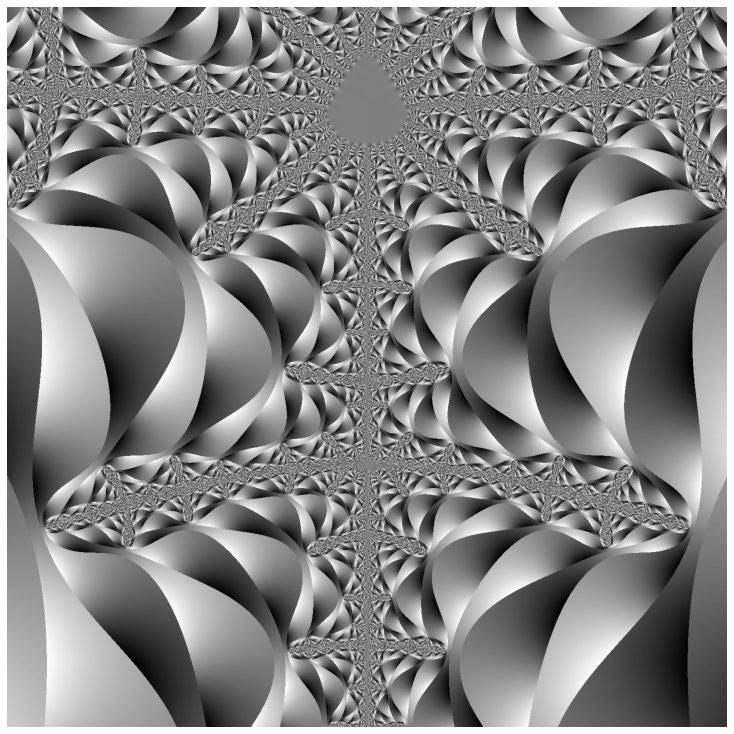

In [4]:
import mandelbrot_compl_cond

t1 = time.time()
resolution = 1440
#mb = mandelbrot.calc_mand(720, 2720, 0.0001, -0.745, 0.13, 2)
mb = mandelbrot_compl_cond.calc_mand(4, resolution, 50, scale=0.005, x=-1.5, y=0)
print ("time:", time.time() - t1)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
fig.patch.set_visible(False)
ax.axis('off')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

ax.imshow(mb.imag, cmap='gray')
plt.gray()

plt.savefig(f'E:\\Temp\\{resolution}.png')

### Movie from imaginary units of of Mandelbrot set with changing condition

In [6]:
from mandelbrot_compl_cond import calc_mand

num = 0

for i in (np.linspace(0.001, 200, 1800)/20 + np.geomspace(0.001, 200, 1800)):   
    mb = calc_mand(i, 1440, 50, scale=2.5, x=-0.5, y=0)

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 20)
    fig.patch.set_visible(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    ax.imshow(mb.imag, cmap='tab20b')

    plt.savefig('E:\\Temp\\tmp/{:04d}.png'.format(num))
    plt.clf()
    
    num += 1